In [89]:
import numpy as np
import matplotlib.pyplot as pyp
x = np.load("assignment8_X.npy")
y = np.load("assignment8_Y.npy")
x = x.T
y = y.T

alpha = 0.01
n = x.shape[0] # n = 10
t = x.shape[1] # t = 25
#w1 = np.ones((m,n))*0.01
#w2 = np.ones((n,m))*0.01

print(n,t)

def NN1_forward_pass(x,y,w1,w2,w3):
    #print("before forward pass, x")
    #print(x)
    #print("w2")
    #print(w2)
    #print("w1")
    #print(w1)
    #print("y")
    #print(y)
    fwx = w3.dot(w2.dot(w1.dot(x)))
    #print("fwx")
    #print(fwx)
    loss = fwx - y
    #print("loss")
    #print(loss)
    return loss

def NN1_backprop(x,w1,w2,w3,n,m):
    dfdw3 = np.zeros((n,n,m))  # 10x10x25
    dfdw2 = np.zeros((n,m,m))  # 10x25x25
    dfdw1 = np.zeros((n,m,n))  # 10x25x10
    dfdh1 = w3.dot(w2)         # 10x25
    dfdh2 = w3                 # 10x25
    dh1dw1 = np.zeros((m,m,n)) # 25x25x10
    dh2dw2 = np.zeros((m,m,m)) # 25x25x25
    h1 = w1.dot(x)             # 25x1
    h2 = w2.dot(h1)            # 25x1
    #print("In BP, h1", x.shape)
    for i in range(n):
        dfdw3[i][i] = h2
    for i in range(m):
        dh1dw1[i][i] = x
        dh2dw2[i][i] = h1
    for i in range(n):
            for j in range(m):
                dfdw2[i] += dh2dw2[j]*dfdh2[i][j]
                dfdw1[i] += dh1dw1[j]*dfdh1[i][j]
    return dfdw1,dfdw2,dfdw3

def VecXTen(vec,tensor):
    result = np.zeros((tensor.shape[1],tensor.shape[2]))
    for i in range(len(vec)):
        result += vec[i]*tensor[i]
    return result

10 25


Final Loss:  1.7962366226647475


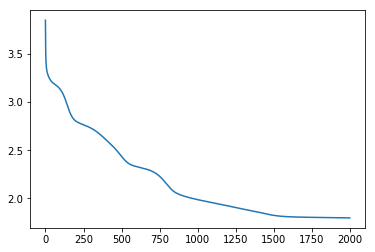

In [91]:
# NN1 with m = 10
m = 10
w1 = np.random.rand(m,n)*0.1
w2 = np.random.rand(m,m)*0.1
w3 = np.random.rand(n,m)*0.1
loss_list = []
for steps in range(2000):
    Gradient_w1 = np.zeros(w1.shape)
    Gradient_w2 = np.zeros(w2.shape)
    Gradient_w3 = np.zeros(w3.shape)
    total_loss = 0
    for col in range(t):
        loss = NN1_forward_pass(x[:,col],y[:,col],w1,w2,w3)
        total_loss += np.linalg.norm(loss)**2
        dfdw1,dfdw2,dfdw3 = NN1_backprop(x[:,col],w1,w2,w3,n,m)
        Gradient_w1 += VecXTen(loss,dfdw1)
        Gradient_w2 += VecXTen(loss,dfdw2)
        Gradient_w3 += VecXTen(loss,dfdw3)
    Gradient_w1 = Gradient_w1 * 2 / t
    Gradient_w2 = Gradient_w2 * 2 / t
    Gradient_w3 = Gradient_w3 * 2 / t
    w1 = w1 - alpha * Gradient_w1
    w2 = w2 - alpha * Gradient_w2
    w3 = w3 - alpha * Gradient_w3
    #print("at iteration ", steps, " loss is ", total_loss/t)
    loss_list.append(total_loss/t)
print("Final Loss: ", total_loss/t)
#print("final W2 * W1: ")
#print(w2.dot(w1))
pyp.plot(loss_list[1:])
pyp.show()
    
    #print("GradientW1: ")
    #print(Gradient_w1)
    #print("loss:")
    #print(loss)
    #print("dfdw1:")
    #print(dfdw1)
    #print("dfdw2:")
    #print(dfdw2)
    

Final Loss:  1.6788260271653126


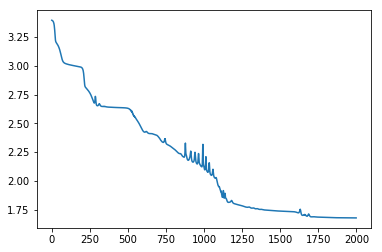

In [92]:
# NN1 with m = 25
m = 25
alpha = 0.05
w1 = np.random.rand(m,n)*0.01
w2 = np.random.rand(m,m)*0.01
w3 = np.random.rand(n,m)*0.01
loss_list = []
for steps in range(2000):
    Gradient_w1 = np.zeros(w1.shape)
    Gradient_w2 = np.zeros(w2.shape)
    Gradient_w3 = np.zeros(w3.shape)
    total_loss = 0
    for col in range(t):
        loss = NN1_forward_pass(x[:,col],y[:,col],w1,w2,w3)
        total_loss += np.linalg.norm(loss)**2
        dfdw1,dfdw2,dfdw3 = NN1_backprop(x[:,col],w1,w2,w3,n,m)
        Gradient_w1 += VecXTen(loss,dfdw1)
        Gradient_w2 += VecXTen(loss,dfdw2)
        Gradient_w3 += VecXTen(loss,dfdw3)
    Gradient_w1 = Gradient_w1 * 2 / t
    Gradient_w2 = Gradient_w2 * 2 / t
    Gradient_w3 = Gradient_w3 * 2 / t
    w1 = w1 - alpha * Gradient_w1
    w2 = w2 - alpha * Gradient_w2
    w3 = w3 - alpha * Gradient_w3
    #print("at iteration ", steps, " loss is ", total_loss/t)
    loss_list.append(total_loss/t)
print("Final Loss: ", total_loss/t)
#print("final W2 * W1: ")
#print(w2.dot(w1))
pyp.plot(loss_list[1:])
pyp.show()
    
    #print("GradientW1: ")
    #print(Gradient_w1)
    #print("loss:")
    #print(loss)
    #print("dfdw1:")
    #print(dfdw1)
    #print("dfdw2:")
    #print(dfdw2)
    

Final Loss:  1.668421258126552


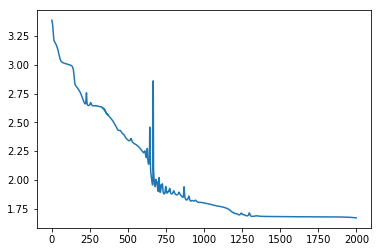

In [95]:
# NN1 with m = 50
m = 50
alpha = 0.05
w1 = np.random.rand(m,n)*0.01
w2 = np.random.rand(m,m)*0.01
w3 = np.random.rand(n,m)*0.01
loss_list = []
for steps in range(2000):
    Gradient_w1 = np.zeros(w1.shape)
    Gradient_w2 = np.zeros(w2.shape)
    Gradient_w3 = np.zeros(w3.shape)
    total_loss = 0
    for col in range(t):
        loss = NN1_forward_pass(x[:,col],y[:,col],w1,w2,w3)
        total_loss += np.linalg.norm(loss)**2
        dfdw1,dfdw2,dfdw3 = NN1_backprop(x[:,col],w1,w2,w3,n,m)
        Gradient_w1 += VecXTen(loss,dfdw1)
        Gradient_w2 += VecXTen(loss,dfdw2)
        Gradient_w3 += VecXTen(loss,dfdw3)
    Gradient_w1 = Gradient_w1 * 2 / t
    Gradient_w2 = Gradient_w2 * 2 / t
    Gradient_w3 = Gradient_w3 * 2 / t
    w1 = w1 - alpha * Gradient_w1
    w2 = w2 - alpha * Gradient_w2
    w3 = w3 - alpha * Gradient_w3
    #print("at iteration ", steps, " loss is ", total_loss/t)
    loss_list.append(total_loss/t)
print("Final Loss: ", total_loss/t)
#print("final W2 * W1: ")
#print(w2.dot(w1))
pyp.plot(loss_list[1:])
pyp.show()
    
    #print("GradientW1: ")
    #print(Gradient_w1)
    #print("loss:")
    #print(loss)
    #print("dfdw1:")
    #print(dfdw1)
    #print("dfdw2:")
    #print(dfdw2)

In [111]:
x = np.load("assignment8_X.npy")
y = np.load("assignment8_Y.npy")
x = x.T
y = y.T

alpha = 0.01
n = x.shape[0] # n = 10
t = x.shape[1] # t = 25
def vec_sigmod(x):
    for i in range(len(x)):
        x[i] = 1/(1+np.exp(-x[i]))
    return x
def sigmod(x):
    return 1/(1+np.exp(-x))
def Sigmod_forward_pass(x,y,w1,w2,w3):
    #print("before forward pass, x")
    #print(x)
    #print("w2")
    #print(w2)
    #print("w1")
    #print(w1)
    #print("y")
    #print(y)
    fwx = w3.dot(vec_sigmod(w2.dot(vec_sigmod(w1.dot(x)))))
    #print("fwx")
    #print(fwx)
    loss = fwx - y
    #print("loss")
    #print(loss)
    return loss

def Sigmod_backprop(x,w1,w2,w3,n,m): # w1 25x10 w2 10x25
    dfdw3 = np.zeros((n,n,m))
    dfdw2 = np.zeros((n,m,m))
    dfdw1 = np.zeros((n,m,n))
    
    # Compute dv2dw2, dv1dw1
    dv2dw2 = np.zeros((m,m,m))
    dv1dw1 = np.zeros((m,m,n))
    h1 = vec_sigmod(w1.dot(x))
    h2 = vec_sigmod(w2.dot(h1))
    for i in range(m):
        dv2dw2[i][i] = h1.T
        dv1dw1[i][i] = x.T
        
    # Compute dfdv2,dfdv1
    dh2dv2 = np.zeros((m,m))    # 25x25
    dh1dv1 = np.zeros((m,m))    # 25x25
    v1 = w1.dot(x) # 25x1
    v2 = w2.dot(vec_sigmod(v1))
    for i in range(m):
        #dh2dv[i][i] = sigmod(v[i])(1-sigmod(v[i]))
        dh2dv2[i][i] = h2[i]*(1-h2[i])
        dh1dv1[i][i] = h1[i]*(1-h1[i])
    dfdv2 = w3.dot(dh2dv2)     # nxm    
    dfdv1 = w3.dot(dh2dv2.dot(w2.dot(dh1dv1)))      # nxm
    
    # Compute dfdw1,dfdw2,dfdw3
    for i in range (n):
        for j in range(m):
            #print(dv2dw2.shape,dfdv2.shape)
            dfdw2[i] += dv2dw2[j]*dfdv2[i][j]
            dfdw1[i] += dv1dw1[j]*dfdv1[i][j]
    for i in range(n):
        dfdw3[i][i] = h2.T
            
    return dfdw1,dfdw2,dfdw3

Final Loss:  0.8272811067483257


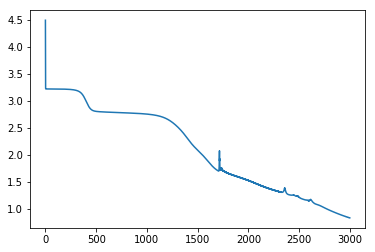

In [80]:
# NN2 with m = 10
alpha = 0.1
m = 10
w1 = np.random.rand(m,n)*0.1 # 10x10
w2 = np.random.rand(m,m)*0.1 # 10x10
w3 = np.random.rand(n,m)*0.1 # 10x10

loss_list = []
for steps in range(3000):
    Gradient_w1 = np.zeros(w1.shape)
    Gradient_w2 = np.zeros(w2.shape)
    Gradient_w3 = np.zeros(w3.shape)
    total_loss = 0
    for col in range(t):
        loss = Sigmod_forward_pass(x[:,col],y[:,col],w1,w2,w3)
        total_loss += np.linalg.norm(loss)**2
        dfdw1,dfdw2,dfdw3 = Sigmod_backprop(x[:,col],w1,w2,w3,n,m)
        Gradient_w1 += VecXTen(loss,dfdw1)
        Gradient_w2 += VecXTen(loss,dfdw2)
        Gradient_w3 += VecXTen(loss,dfdw3)
    Gradient_w1 = Gradient_w1 * 2 / t
    Gradient_w2 = Gradient_w2 * 2 / t
    Gradient_w3 = Gradient_w3 * 2 / t
    w1 = w1 - alpha * Gradient_w1
    w2 = w2 - alpha * Gradient_w2
    w3 = w3 - alpha * Gradient_w3
    #print("at iteration ", steps, " loss is ", total_loss/t)
    loss_list.append(total_loss/t)
print("Final Loss: ", total_loss/t)
#print("final W2 * W1: ")
#print(w2.dot(w1))
pyp.plot(loss_list)
pyp.show()
    #print("GradientW1: ")
    #print(Gradient_w1)
    #print("loss:")
    #print(loss)
    #print("dfdw1:")
    #print(dfdw1)
    #print("dfdw2:")
    #print(dfdw2)
    

Final Loss:  0.6054593372685161


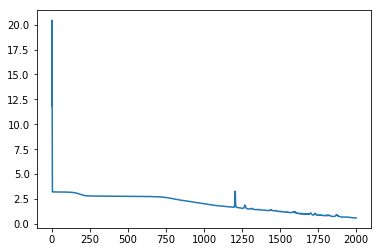

In [112]:
# NN2 with m = 25
alpha = 0.1
m = 25
w1 = np.random.rand(m,n)*0.1 # 10x10
w2 = np.random.rand(m,m)*0.1 # 10x10
w3 = np.random.rand(n,m)*0.1 # 10x10

loss_list = []
for steps in range(2000):
    Gradient_w1 = np.zeros(w1.shape)
    Gradient_w2 = np.zeros(w2.shape)
    Gradient_w3 = np.zeros(w3.shape)
    total_loss = 0
    for col in range(t):
        loss = Sigmod_forward_pass(x[:,col],y[:,col],w1,w2,w3)
        total_loss += np.linalg.norm(loss)**2
        dfdw1,dfdw2,dfdw3 = Sigmod_backprop(x[:,col],w1,w2,w3,n,m)
        Gradient_w1 += VecXTen(loss,dfdw1)
        Gradient_w2 += VecXTen(loss,dfdw2)
        Gradient_w3 += VecXTen(loss,dfdw3)
    Gradient_w1 = Gradient_w1 * 2 / t
    Gradient_w2 = Gradient_w2 * 2 / t
    Gradient_w3 = Gradient_w3 * 2 / t
    w1 = w1 - alpha * Gradient_w1
    w2 = w2 - alpha * Gradient_w2
    w3 = w3 - alpha * Gradient_w3
    #print("at iteration ", steps, " loss is ", total_loss/t)
    loss_list.append(total_loss/t)
print("Final Loss: ", total_loss/t)
#print("final W2 * W1: ")
#print(w2.dot(w1))
pyp.plot(loss_list)
pyp.show()
    #print("GradientW1: ")
    #print(Gradient_w1)
    #print("loss:")
    #print(loss)
    #print("dfdw1:")
    #print(dfdw1)
    #print("dfdw2:")
    #print(dfdw2)

at iteration  0  loss is  48.52351609517251
at iteration  1  loss is  19.898319420259313
at iteration  2  loss is  9.481066578047855
at iteration  3  loss is  5.588448438649789
at iteration  4  loss is  4.118639879076236
at iteration  5  loss is  3.561419467927985
at iteration  6  loss is  3.349845151275653
at iteration  7  loss is  3.2694632721417447
at iteration  8  loss is  3.238916703262795
at iteration  9  loss is  3.227306615467484
at iteration  10  loss is  3.2228928752669304
at iteration  11  loss is  3.221214051160381
at iteration  12  loss is  3.220574627080645
at iteration  13  loss is  3.2203302270363623
at iteration  14  loss is  3.220235955909908
at iteration  15  loss is  3.2201987411205595
at iteration  16  loss is  3.220183210370075
at iteration  17  loss is  3.220175920406777
at iteration  18  loss is  3.2201717621259984
at iteration  19  loss is  3.220168793816177
at iteration  20  loss is  3.2201662775318596
at iteration  21  loss is  3.2201639328176026
at iteration

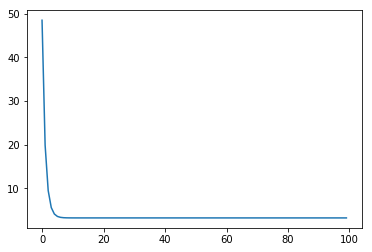

In [115]:
# NN2 with m = 50
alpha = 0.005
m = 50
w1 = np.random.rand(m,n)*0.1 # 10x10
w2 = np.random.rand(m,m)*0.1 # 10x10
w3 = np.random.rand(n,m)*0.1 # 10x10

loss_list = []
for steps in range(100):
    Gradient_w1 = np.zeros(w1.shape)
    Gradient_w2 = np.zeros(w2.shape)
    Gradient_w3 = np.zeros(w3.shape)
    total_loss = 0
    for col in range(t):
        loss = Sigmod_forward_pass(x[:,col],y[:,col],w1,w2,w3)
        total_loss += np.linalg.norm(loss)**2
        dfdw1,dfdw2,dfdw3 = Sigmod_backprop(x[:,col],w1,w2,w3,n,m)
        Gradient_w1 += VecXTen(loss,dfdw1)
        Gradient_w2 += VecXTen(loss,dfdw2)
        Gradient_w3 += VecXTen(loss,dfdw3)
    Gradient_w1 = Gradient_w1 * 2 / t
    Gradient_w2 = Gradient_w2 * 2 / t
    Gradient_w3 = Gradient_w3 * 2 / t
    w1 = w1 - alpha * Gradient_w1
    w2 = w2 - alpha * Gradient_w2
    w3 = w3 - alpha * Gradient_w3
    print("at iteration ", steps, " loss is ", total_loss/t)
    loss_list.append(total_loss/t)
print("Final Loss: ", total_loss/t)
#print("final W2 * W1: ")
#print(w2.dot(w1))
pyp.plot(loss_list)
pyp.show()
    #print("GradientW1: ")
    #print(Gradient_w1)
    #print("loss:")
    #print(loss)
    #print("dfdw1:")
    #print(dfdw1)
    #print("dfdw2:")
    #print(dfdw2)

at iteration  0  loss is  2249.926668204162
at iteration  1  loss is  1224.3821427445273
at iteration  2  loss is  778.1329916504867
at iteration  3  loss is  525.5376917410433
at iteration  4  loss is  381.9774660979659
at iteration  5  loss is  291.64851031602285
at iteration  6  loss is  237.36818510774543
at iteration  7  loss is  201.7412779853801
at iteration  8  loss is  179.37991573935935
at iteration  9  loss is  163.21021855855665
at iteration  10  loss is  149.46645214698276
at iteration  11  loss is  137.10239097978692
at iteration  12  loss is  127.08918819931627
at iteration  13  loss is  118.80867185517633
at iteration  14  loss is  111.7192711977907
at iteration  15  loss is  105.85584712869708
at iteration  16  loss is  100.7396708064748
at iteration  17  loss is  96.64124932300159
at iteration  18  loss is  92.89000368763753
at iteration  19  loss is  89.82463478334707
at iteration  20  loss is  85.99282511333197
at iteration  21  loss is  83.07635332002492
at iterati

at iteration  188  loss is  19.314503328383005
at iteration  189  loss is  19.182489347208943
at iteration  190  loss is  19.11352993969391
at iteration  191  loss is  19.00351592239549
at iteration  192  loss is  18.925951967755157
at iteration  193  loss is  18.798971673393464
at iteration  194  loss is  18.705464940840045
at iteration  195  loss is  18.674067882517512
at iteration  196  loss is  18.53258309184459
at iteration  197  loss is  18.449203987745584
at iteration  198  loss is  18.350556278294203
at iteration  199  loss is  18.21928466848051
at iteration  200  loss is  18.205466069158913
at iteration  201  loss is  18.072024484136975
at iteration  202  loss is  17.939552033524443
at iteration  203  loss is  17.86989210823416
at iteration  204  loss is  17.709161459750636
at iteration  205  loss is  17.741688877261048
at iteration  206  loss is  17.52580548588529
at iteration  207  loss is  17.57120322430942
at iteration  208  loss is  17.426485362487263
at iteration  209  l

at iteration  378  loss is  3.048363917511047
at iteration  379  loss is  3.0147279694549916
at iteration  380  loss is  2.9390836772145263
at iteration  381  loss is  2.8572951218807603
at iteration  382  loss is  2.859250543694575
at iteration  383  loss is  2.7652601079267995
at iteration  384  loss is  2.710109138651635
at iteration  385  loss is  2.6384886980819395
at iteration  386  loss is  2.599048265918441
at iteration  387  loss is  2.5560924754188825
at iteration  388  loss is  2.486171990672613
at iteration  389  loss is  2.447757804135577
at iteration  390  loss is  2.3491573870889724
at iteration  391  loss is  2.315944456334197
at iteration  392  loss is  2.2890131907018336
at iteration  393  loss is  2.2120860017108406
at iteration  394  loss is  2.13504804828861
at iteration  395  loss is  2.072492465999421
at iteration  396  loss is  2.032840646749964
at iteration  397  loss is  1.9924891418567015
at iteration  398  loss is  1.9163836277313564
at iteration  399  loss 

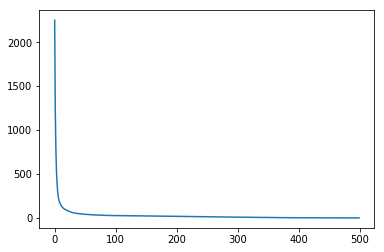

In [109]:
# Linear SVM NN
X = np.load("assignment9_X.npy")
Y = np.load("assignment9_Y.npy")
t = np.shape(X)[1]   # number of sameples 50 (=np.shape(Y))
n = np.shape(X)[0]   # dimension of samples 10
k = 10               # number of classes
L = 0                # loss
total_loss = 0       # total loss
L_list = []
alpha = 0.0012         # learning rate
W = np.random.rand(k,n)*0.01 # weight matrix
fix_margin = 5
for steps in range(500):
    dLdW = np.zeros((k,n))    # partial devirative of L with respect to W
    for i in range(t):
        classOfx = Y[i]
        counter = 0
        for j in range(k):
            if j != classOfx:
                L += max(0,W[j].dot(X[:,i])-W[classOfx].dot(X[:,i])+fix_margin)
                #print(X[:,i].shape)
                if(W[j].dot(X[:,i])-W[classOfx].dot(X[:,i])+fix_margin > 0):
                    counter += 1
                total_loss += L
                L = 0
        dLdW[classOfx] += -1 * counter * X[:,i].T
    W = W - alpha * dLdW
    print("at iteration ", steps, " loss is ", total_loss)
    L_list.append(total_loss)
    total_loss = 0
pyp.plot(L_list)
pyp.show()

In [32]:
Y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9])